## Load Necessary Libraries

In [22]:
#pip install wordcloud
#!pip install tensorflow

In [23]:
import pandas as panda
import numpy as np
import matplotlib.pyplot as GraphPlot
import seaborn as snsPlot
from wordcloud import WordCloud as WordCloudPlot
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D,MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Email Phising Dataset

In [25]:
Email_Phising= panda.read_csv('Phishing_Email.csv')
Email_Phising.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


## Data Exploration

In [26]:
# Dropping unnecessary column from the dataset
Email_Phising = Email_Phising.drop('Unnamed: 0', axis=1)

In [27]:
Email_Phising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  18634 non-null  object
 1   Email Type  18650 non-null  object
dtypes: object(2)
memory usage: 291.5+ KB


In [28]:
# data Cleaning
Email_Phising = Email_Phising.dropna()
Email_Phising = Email_Phising.reset_index(drop=True)
Email_Phising.isnull().sum()

Email Text    0
Email Type    0
dtype: int64


## Exploratory Data Analysis

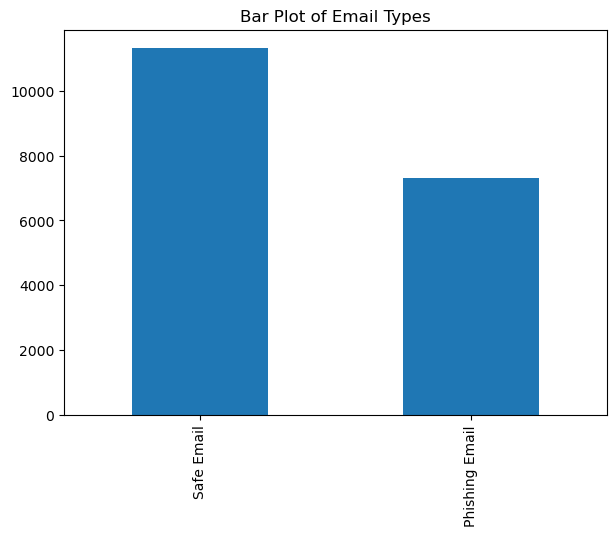

In [29]:
# Bar Plot of Email Types
GraphPlot.figure(figsize=(7,5))
Email_Phising['Email Type'].value_counts().plot(kind='bar')
GraphPlot.title('Bar Plot of Email Types')
GraphPlot.show()

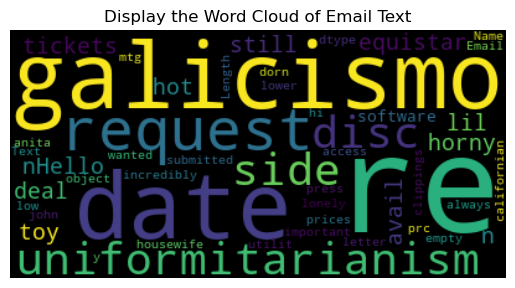

In [30]:
# Word Cloud of Email Text
WordCloudPlot = WordCloudPlot(random_state=21, max_font_size=110).generate(str(Email_Phising['Email Text']))
GraphPlot.imshow(WordCloudPlot, interpolation="bilinear")
GraphPlot.axis('off')
GraphPlot.title('Display the Word Cloud of Email Text')
GraphPlot.show()

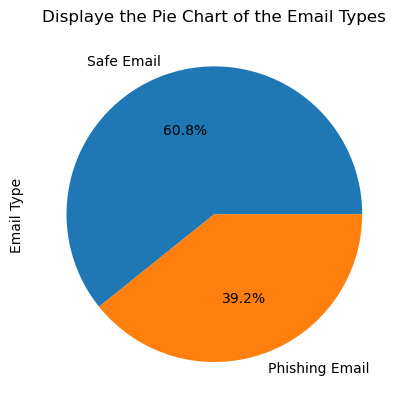

In [31]:
# Pie Chart of Email Types
Email_Phising['Email Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
GraphPlot.title('Displaye the Pie Chart of the Email Types')
GraphPlot.show()

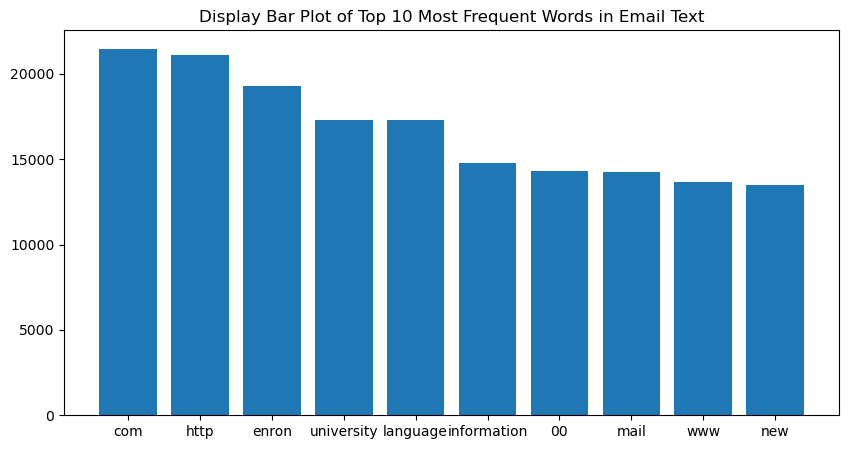

In [32]:
# Bar Plot of Top 10 Most Frequent Words in Email Text
CountVectorizerFunc = CountVectorizer(stop_words='english')
Xfit = CountVectorizerFunc.fit_transform(Email_Phising['Email Text'].dropna())
wordsum = Xfit.sum(axis=0)
frequencywords = [(textword, wordsum[0, idx]) for textword, idx in CountVectorizerFunc.vocabulary_.items()]
frequencywords = sorted(frequencywords, key = lambda x: x[1], reverse=True)
words_frequency_top_10 = frequencywords[:10]
GraphPlot.figure(figsize=(10,5))
GraphPlot.bar(*zip(*words_frequency_top_10))
GraphPlot.title('Display Bar Plot of Top 10 Most Frequent Words in Email Text')
GraphPlot.show()

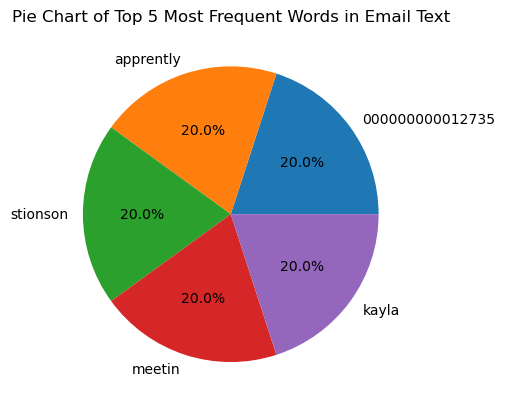

In [33]:
# Pie Chart of Top 5 Most Frequent Words in Email Text
words_frequency_top_5 = frequencywords[-5:]
GraphPlot.pie([freq for textword, freq in words_frequency_top_5], labels=[textword for textword, freq in words_frequency_top_5], autopct='%1.1f%%')
GraphPlot.title('Pie Chart of Top 5 Most Frequent Words in Email Text')
GraphPlot.show()

## Data Preprocessing

In [34]:
# Selecting features abd target column of the dataset for model fitting
featuredata = Email_Phising['Email Text']
targetdata = Email_Phising['Email Type']

In [35]:
# Label Encoding of the target column
lebelencoding = LabelEncoder()
targetdata = lebelencoding.fit_transform(targetdata)

### Data Splitting

In [36]:
# Separate the data into test sets as well as training sets between (80% and 20%)
X_train, X_test, y_train, y_test = train_test_split(featuredata, targetdata, test_size=0.2, random_state=42)

### Feature Extraction

In [37]:
# Initialize the tokenizer process
Wordmax = 10000
tokenizersetup = Tokenizer(num_words=Wordmax)
tokenizersetup.fit_on_texts(X_train)

In [38]:
# Perform a sequence conversion on the text.
XtrainSequence = tokenizersetup.texts_to_sequences(X_train)
XtestSquence = tokenizersetup.texts_to_sequences(X_test)

In [39]:
# Fill in the gaps between the sequences.
maxseqlength =100
Xtrainpadding = pad_sequences(XtrainSequence, maxlen=maxseqlength)
Xtestpadding = pad_sequences(XtestSquence, maxlen=maxseqlength)

In [40]:
# Create CountVectorizer for Random Forest and logistic regression model
Countvectorizerfunc = CountVectorizer(max_features=1000)  # You can adjust the max_features value
Xtrain_vector = Countvectorizerfunc.fit_transform(X_train)
Xtest_vector = Countvectorizerfunc.transform(X_test)

## Model Development

#### CNN Model

In [41]:
vocabulary_size = len(tokenizersetup.word_index) + 1
modelCreation = Sequential()
modelCreation.add(Embedding(input_dim=vocabulary_size, output_dim=50, input_length=maxseqlength))
modelCreation.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
modelCreation.add(MaxPooling1D(pool_size=2))
modelCreation.add(Flatten())
modelCreation.add(Dense(1, activation='sigmoid'))
# To create the model, compile the data.
modelCreation.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Investigate the Model's Executive Summary.
modelCreation.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           7534150   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           32128     
                                                                 
 max_pooling1d (MaxPooling1  (None, 48, 128)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6144)              0         
                                                                 
 dense (Dense)               (None, 1)                 6145      
                                                                 
Total params: 7572423 (28.89 MB)
Trainable params: 7572423 (28.89 MB)
Non-trainable params: 0 (0.00 Byte)
________________

#### Train the CNN Model

In [42]:
# Create a Model for the CNN
ModelHist = modelCreation.fit(Xtrainpadding, y_train, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
210/210 [==============================] - 39s 176ms/step - loss: 0.2471 - accuracy: 0.8799 - val_loss: 0.1132 - val_accuracy: 0.9517
Epoch 2/10
210/210 [==============================] - 36s 171ms/step - loss: 0.0562 - accuracy: 0.9791 - val_loss: 0.0876 - val_accuracy: 0.9645
Epoch 3/10
210/210 [==============================] - 36s 170ms/step - loss: 0.0304 - accuracy: 0.9866 - val_loss: 0.0934 - val_accuracy: 0.9665
Epoch 4/10
210/210 [==============================] - 36s 171ms/step - loss: 0.0236 - accuracy: 0.9886 - val_loss: 0.1026 - val_accuracy: 0.9638
Epoch 5/10
210/210 [==============================] - 37s 174ms/step - loss: 0.0216 - accuracy: 0.9892 - val_loss: 0.1154 - val_accuracy: 0.9638
Epoch 6/10
210/210 [==============================] - 36s 173ms/step - loss: 0.0204 - accuracy: 0.9893 - val_loss: 0.1167 - val_accuracy: 0.9631
Epoch 7/10
210/210 [==============================] - 37s 174ms/step - loss: 0.0198 - accuracy: 0.9893 - val_loss: 0.1303 - val_ac

#### Random Forest Model

In [43]:
# Build the model employing Random Forest.
RandomModelCreation = RandomForestClassifier(n_estimators=100, random_state=42)
RandomModelCreation.fit(Xtrain_vector, y_train)

RandomForestClassifier(random_state=42)


#### Logistic Regression Model

In [44]:
# Build the model employing Logistic Regression.
LogisticModelCreation = LogisticRegression(random_state=42)
LogisticModelCreation.fit(Xtrain_vector, y_train)

C:\Users\hello\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### Model Evualtion

#### Evaluate CNN model

In [45]:
#Analyse the model's performance.
CNNPredict = modelCreation.predict(Xtestpadding)
CNNPredict = np.round(CNNPredict).astype(int)
CNNAccuracy = accuracy_score(y_test, CNNPredict)
print("Display the CNN Model Accuracy:", CNNAccuracy)

117/117 [==============================] - 1s 10ms/step
Display the CNN Model Accuracy: 0.9640461497182721


In [46]:
# Confusion matrix
cnntest_labels = lebelencoding.inverse_transform(y_test)
cnnpred_labels = lebelencoding.inverse_transform(CNNPredict)
print("Display the Classification Report based on the CNN model:")
print(classification_report(cnntest_labels, cnnpred_labels))

C:\Users\hello\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Display the Classification Report based on the CNN model:
                precision    recall  f1-score   support

Phishing Email       0.94      0.98      0.96      1518
    Safe Email       0.98      0.96      0.97      2209

      accuracy                           0.96      3727
     macro avg       0.96      0.97      0.96      3727
  weighted avg       0.96      0.96      0.96      3727



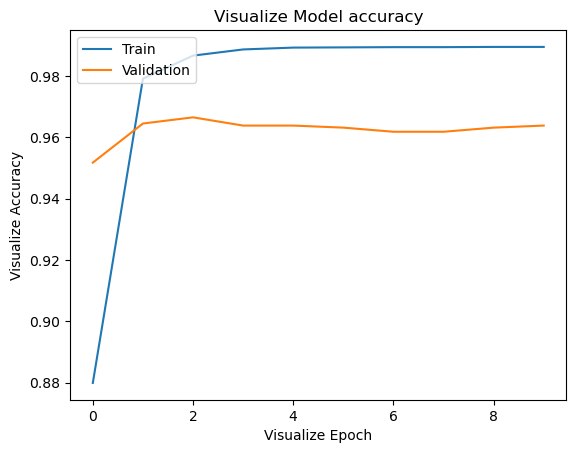

In [47]:
# Graph the accuracy values for training as well as validation.
GraphPlot.plot(ModelHist.history['accuracy'])
GraphPlot.plot(ModelHist.history['val_accuracy'])
GraphPlot.title('Visualize Model accuracy')
GraphPlot.ylabel('Visualize Accuracy')
GraphPlot.xlabel('Visualize Epoch')
GraphPlot.legend(['Train', 'Validation'], loc='upper left')
GraphPlot.show()

#### Evaluate Logistic Regression model

In [48]:
LogPred = LogisticModelCreation.predict(Xtest_vector)
LogPredAccur = accuracy_score(y_test, LogPred)
print("Logistic Regression Accuracy:", LogPredAccur)

Logistic Regression Accuracy: 0.9511671585725785


In [49]:
# Produce a report on the categorization.
y_test_labels = lebelencoding.inverse_transform(y_test)
y_pred_lr_labels = lebelencoding.inverse_transform(LogPred)
print("Logistic Regression Classification Report:")
print(classification_report(y_test_labels, y_pred_lr_labels))

Logistic Regression Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.92      0.97      0.94      1518
    Safe Email       0.98      0.94      0.96      2209

      accuracy                           0.95      3727
     macro avg       0.95      0.95      0.95      3727
  weighted avg       0.95      0.95      0.95      3727



#### Evaluate Random Forest model

In [27]:
ypred_random = RandomModelCreation.predict(Xtest_vector)
randomaccur = accuracy_score(y_test, ypred_random)
print("Display the Random Forest Accuracy:", randomaccur)

Display the Random Forest Accuracy: 0.9578749664609606


In [28]:
# Produce a report on the categorization.
y_test_labels = lebelencoding.inverse_transform(y_test)
y_pred_rf_labels = lebelencoding.inverse_transform(ypred_random)
print("Display the Random Forest Classification Report:")
print(classification_report(y_test_labels, y_pred_rf_labels))

Display the Random Forest Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.94      0.96      0.95      1518
    Safe Email       0.97      0.96      0.96      2209

      accuracy                           0.96      3727
     macro avg       0.95      0.96      0.96      3727
  weighted avg       0.96      0.96      0.96      3727



### Create Phishing Detection Function

In [50]:
def detect_phishing(email_message):
    email_seq = tokenizersetup.texts_to_sequences([email_message])
    email_pad = pad_sequences(email_seq, maxlen=maxseqlength)
    prediction = modelCreation.predict(email_pad)
    prediction_label = lebelencoding.inverse_transform(np.round(prediction).astype(int).flatten())[0]
    return "Phishing Email" if prediction_label == "Phishing Email" else "Safe Email"

# User interaction
while True:
    email_message = input("Enter an email message (or 'exit' to quit): ")
    if email_message.lower() == 'exit':
        break
    prediction = detect_phishing(email_message)
    print("\n\n Prediction:", prediction)

Enter an email message (or 'exit' to quit): hello
1/1 [==============================] - 0s 42ms/step


 Prediction: Phishing Email
Enter an email message (or 'exit' to quit): quit
1/1 [==============================] - 0s 45ms/step


 Prediction: Phishing Email
Enter an email message (or 'exit' to quit): exit
